In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [3]:
#gridc.cod;uf_h.dat;vf_h.dat
#name=[Roc,Shelter,ADMS,prime,prime_roc]
#asp=[111,112]
#name='prime_roc'; asp=112
#df_x = 'output/gridc.cod'; df_x=df_x.format(name,asp)
#df_y = 'output/gridc.cod'; df_y=df_y.format(name,asp)
#df_z = 'output/gridc.cod'; df_z=df_z.format(name,asp)
#uf_v = 'output/uf_v.dat';  uf_v=uf_v.format(name,asp)
#wf_v = 'output/wf_v.dat';  wf_v=wf_v.format(name,asp)

#df_x = pd.read_csv(df_x, header=None,delim_whitespace=False,skiprows=1,  nrows=100 )
#df_y = pd.read_csv(df_y, header=None,delim_whitespace=False,skiprows=102,nrows=152 )
#df_z = pd.read_csv(df_z, header=None,delim_whitespace=False,skiprows=153,nrows=20  )
#uf_v = pd.read_csv(uf_v, header=None,delim_whitespace=False)#skiprows=0,  nrows=8000)
#wf_v = pd.read_csv(wf_v, header=None,delim_whitespace=False)#skiprows=0,  nrows=8000)

In [4]:
# load the data including pressure and vector fields of each point
# calculated and exported by COMSOL Multiphysics
# gridc.cod; uf_h.dat; vf_h.dat
# name=[Roc, Shelter, ADMS, prime, prime_roc]
# asp=[111, 112]
name = 'prime_roc'
asp = 112

# Set file paths
df_x = 'output/gridc.cod'
df_y = 'output/gridc.cod'
df_z = 'output/gridc.cod'
uf_v = 'output/uf_v.dat'
wf_v = 'output/wf_v.dat'

# Load the data
df_x = pd.read_csv(df_x, header=None, sep=r'\s+', skiprows=1, nrows=300)
df_y = pd.read_csv(df_y, header=None, sep=r'\s+', skiprows=302, nrows=200)
df_z = pd.read_csv(df_z, header=None, sep=r'\s+', skiprows=503, nrows=80)
uf_v = pd.read_csv(uf_v, header=None, sep=r'\s+')  # , skiprows=5, nrows=5000)
wf_v = pd.read_csv(wf_v, header=None, sep=r'\s+')  # , skiprows=60005, nrows=5000)

In [5]:
## 定義域[-1, 1]のx, yを各区切りで生成
#x = np.linspace(-0.177000001,  0.416999996,100)
#y = np.linspace(-0.207000002,  0.207000002, 70)
#z = np.linspace(3.00000003E-03,0.476999998, 80)
#df_x=[]; df_z=[]
## メッシュグリッドを生成
#xv, zv = np.meshgrid(x, z)
#for xx,zz in zip(xv, zv):
#    for x,z in zip(xx, zz):
#        df_x.extend([x])
#        df_z.extend([z])
#df_x; df_z; uf_v; wf_v

In [6]:
# NumPy配列として出力する場合
print("df_x:")
print(np.array(df_x))

print("df_z:")
print(np.array(df_z))

df_x:
[[-104.75]
 [-104.25]
 [-103.75]
 [-103.25]
 [-102.75]
 [-102.25]
 [-101.75]
 [-101.25]
 [-100.75]
 [-100.25]
 [ -99.75]
 [ -99.25]
 [ -98.75]
 [ -98.25]
 [ -97.75]
 [ -97.25]
 [ -96.75]
 [ -96.25]
 [ -95.75]
 [ -95.25]
 [ -94.75]
 [ -94.25]
 [ -93.75]
 [ -93.25]
 [ -92.75]
 [ -92.25]
 [ -91.75]
 [ -91.25]
 [ -90.75]
 [ -90.25]
 [ -89.75]
 [ -89.25]
 [ -88.75]
 [ -88.25]
 [ -87.75]
 [ -87.25]
 [ -86.75]
 [ -86.25]
 [ -85.75]
 [ -85.25]
 [ -84.75]
 [ -84.25]
 [ -83.75]
 [ -83.25]
 [ -82.75]
 [ -82.25]
 [ -81.75]
 [ -81.25]
 [ -80.75]
 [ -80.25]
 [ -79.75]
 [ -79.25]
 [ -78.75]
 [ -78.25]
 [ -77.75]
 [ -77.25]
 [ -76.75]
 [ -76.25]
 [ -75.75]
 [ -75.25]
 [ -74.75]
 [ -74.25]
 [ -73.75]
 [ -73.25]
 [ -72.75]
 [ -72.25]
 [ -71.75]
 [ -71.25]
 [ -70.75]
 [ -70.25]
 [ -69.75]
 [ -69.25]
 [ -68.75]
 [ -68.25]
 [ -67.75]
 [ -67.25]
 [ -66.75]
 [ -66.25]
 [ -65.75]
 [ -65.25]
 [ -64.75]
 [ -64.25]
 [ -63.75]
 [ -63.25]
 [ -62.75]
 [ -62.25]
 [ -61.75]
 [ -61.25]
 [ -60.75]
 [ -60.25]
 [ -

In [7]:
width=1 #箱の長さ*10/df_x
x=np.array(df_x)*width
z=np.array(df_z)*width
u=np.array(uf_v)
w=np.array(wf_v)
#print(len(x),len(z),len(u),len(w))
print(x.shape,z.shape,u.shape,w.shape)
print(w)

(300, 1) (80, 1) (24000, 1) (24000, 1)
[[-1.03346123e-08]
 [-3.09954373e-08]
 [-5.16383913e-08]
 ...
 [-9.19743688e-05]
 [-5.51703597e-05]
 [-1.83877619e-05]]


In [8]:
# the lines and rows of the input array
#xlen = int(x.shape[0]**0.5)
#zlen = int(z.shape[0]**0.5)
#print(xlen,zlen)
xlen=x.shape[0]
zlen=z.shape[0]
print(xlen,zlen)

300 80


In [9]:
# make unique array from mesh-gridded input array
x_row = x[: xlen] #-1
z_row = z[: zlen]
#print(x_row);print(z_row)
print(x_row.shape, z_row.shape)

(300, 1) (80, 1)


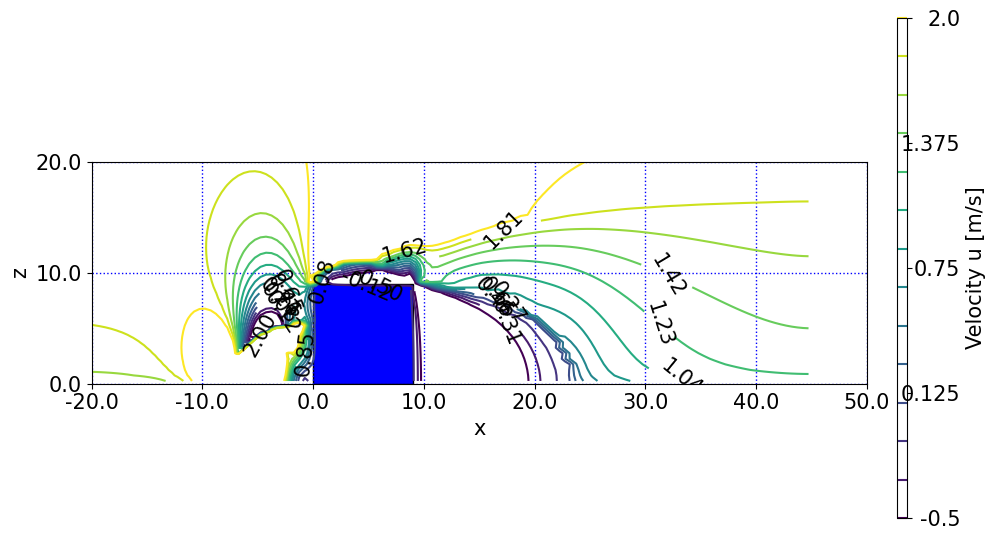

In [12]:
# limit the range of the data
sigma = 0.0 # this depends on how noisy your data is, play with it!
XX,ZZ = np.meshgrid(x_row,z_row)
cont_u = uf_v.values.reshape(zlen,xlen)
cont_u = np.array(cont_u)
cont_ug = gaussian_filter(cont_u, sigma)
cont_w = wf_v.values.reshape(zlen,xlen)
cont_w = np.array(cont_w)
cont_wg = gaussian_filter(cont_w, sigma)
minvel=-0.5
maxvel=+2.0
dev=5
#plt.rcParams['xtick.direction'] = 'in'#軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams['ytick.direction'] = 'in'#軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')

fig = plt.figure(facecolor="w",figsize=(10,10))
ax = plt.axes()
ax.set_aspect('equal')

# plot the u_velocity data
cont_cl=plt.contour(XX, ZZ, cont_ug, 
                    np.linspace(minvel,maxvel,14), cmap='viridis') # cmap=cm.jet
plt.clabel(cont_cl, fmt='%1.2f', inline=True, inline_spacing=0.01, fontsize=15, colors="black")

# draw the obstacle
if asp == 111:
    h = 9.0
elif asp == 112:
    h = 9.0   
rectangle = patches.Rectangle(xy=(0.0,0.0), width=9.0, height=h, 
                              edgecolor='black', facecolor='blue', fill=True)
ax.add_patch(rectangle)

plt.axis([0, 5.01, 0, h+1.01]) # [min_x,max_x,  min_y,max_y]
#plt.xlim(0,5) # [[min_x,max_x]
#plt.ylim(0,3) # [min_x,max_x]
plt.xlabel('x', fontsize=15)
plt.ylabel('z', fontsize=15)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(-20, 50.01, 10.) )
plt.yticks( np.arange(0, 20.01, 10.) )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# adjust colorbar
fig_coord = [0.93,0.25,0.01,0.5]
cbar_ax = fig.add_axes(fig_coord)
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_ticks(np.linspace(minvel,maxvel,dev))
cbar.set_ticklabels(np.linspace(minvel,maxvel,dev))
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(ticklabs,ha='right', fontsize=15)
cbar.ax.yaxis.set_tick_params(pad=35)  # your number may vary
cbar.set_label("Velocity u [m/s]", fontsize=15)

figname_b='wang_{0}_{1}_cont_v.png'
figname=figname_b.format(name,asp)
plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)

ValueError: Starting point (0.0, 0.1) outside of data boundaries

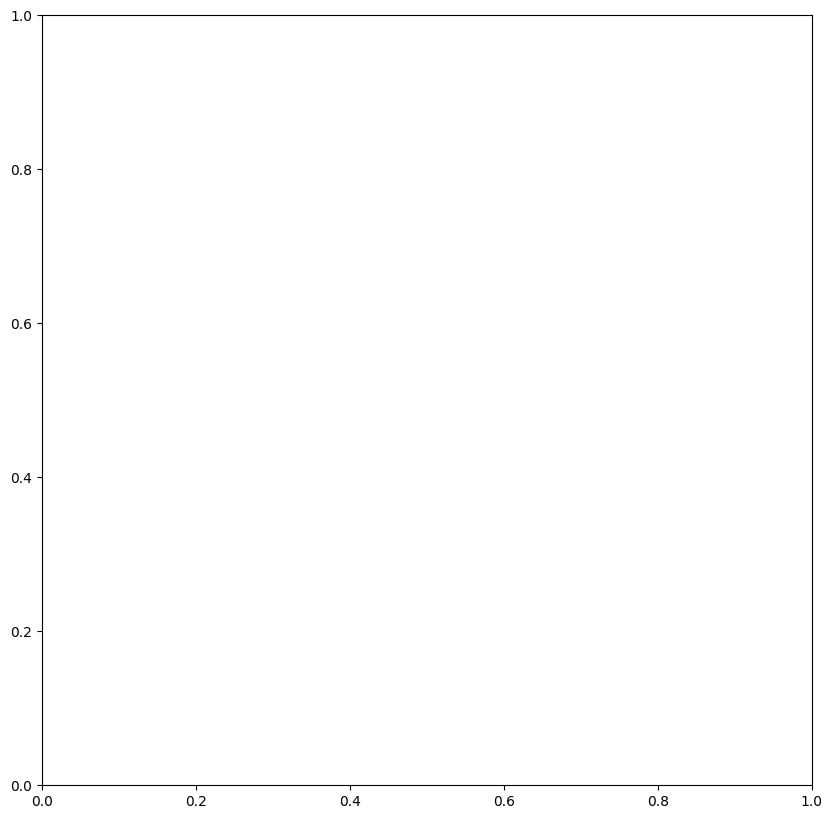

In [8]:
# plot the u_velocity data
fig = plt.figure(facecolor="w",figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

speed=(cont_u**2+cont_w**2)**0.5
minvel=-15
maxvel=15
dev=5
label_val=np.linspace(minvel,maxvel,dev)
label_val=np.round(label_val, decimals=2)
#label_val=np.arange(0.0, 1.4, 0.6) #1:1:1
#label_val=np.arange(0.0, 1.71, 0.85) #1:1:2

#x1=[-2, -0.5, 0.5, 1.18, 1.19, 1.2, 2.5] #plt.axis([-3, 7, 0, 3])
#ng=40;dens=40; x1=[0, 0.5, 1.24, 2.3, 5.0]  #plt.axis([0, 5, 0, 3]) Roc 1:1:1
#ng=40;dens=50; x1=[0, 0.5, 1.24, 2.3, 5.0]  # Shelter                   1:1:1
#ng=40;dens=50; x1=[0, 0.5, 1.22, 2.25, 5.0] # ADMS                      1:1:1
#ng=40;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # prime                     1:1:1
#ng=40;dens=60;x1=[0, 0.5, 1.27, 2.3, 5.0]  # prime_roc                 1:1:1
#ng=60;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # Roc                       1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # Shelter                   1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # ADMS                      1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.5, 2.25, 5.0]  # prime                     1:1:2
ng=60;dens=50;x1=[0, 0.5, 1.43, 2.3, 5.0]  # prime_roc                 1:1:2
#dens=60;x1=[1.43,2.3] # test
#ng=25             # test
#dens=60;x1=[1.43,2.3] # test
#ng=25             # test
if asp == 111:
    fh = 2.0
elif asp == 112:
    fh = 3.0  
for a in x1:
    x1 = [a for i in range(ng)]
    y1 = np.linspace(0.1,fh,ng)
    seed_points =np.array([x1,y1])
    #add legend of Speed
#    strm=plt.streamplot(XX, ZZ, cont_u, cont_w, density=dens, linewidth=1, 
#                        color=speed, cmap='viridis', norm=None,
#                        arrowstyle='-',maxlength=50.0, 
#                        start_points=seed_points.T,integration_direction='both')
    # no legend
    strm=plt.streamplot(XX, ZZ, cont_u, cont_w, density=dens, linewidth=1, 
                        color='black', norm=None,
                        arrowstyle='-',maxlength=50.0, 
                        start_points=seed_points.T,integration_direction='both')

    #matplotlib.pyplot.streamplot(x, y, u, v, density=1, linewidth=None, 
    #  color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', 
    #  minlength=0.1, transform=None, zorder=None, start_points=None, 
    #  maxlength=4.0, integration_direction='both', *, data=None)
    # draw the obstacle

#plt.axis([-3, 7, 0, 3])
plt.axis([0, 5, 0, fh+0.01])
plt.xlabel('x/w')
plt.ylabel('z/w')
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.yticks( np.arange(0, fh+0.01, 1) )

# draw an obstacle
if asp == 111:
    h = 1.0
elif asp == 112:
    h = 2.0   
rectangle = patches.Rectangle(xy=(0.0,0.0), width=1.0, height=h, 
                              edgecolor='black', facecolor='gray', fill=True)
ax.add_patch(rectangle)

## adjust colorbar
#fig_coord = [0.91,0.25,0.01,0.50]
#cbar_ax = fig.add_axes(fig_coord)
#cbar = plt.colorbar(cax=cbar_ax)
#cbar_ax.set_ylim(minvel,maxvel)
#cbar.set_ticks(label_val)
#cbar.set_ticklabels(label_val)
##ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs,ha='right')
#cbar.ax.yaxis.set_tick_params(pad=10)  # your number may vary
#cbar.set_label("Speed [m/s]")

figname_b='wang_{0}_{1}_stream_v.png'
figname=figname_b.format(name,asp)
plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)

In [9]:
# set aspect ratio to equal
#plt.xlim(0,5) # [[min_x,max_x]
#plt.ylim(0,3) # [min_x,max_x]

## set aspect ratio to equal
#plt.axes().set_aspect("equal","datalim")
#plt.xlim(0,2.2)
#plt.ylim(0,0.4)

TypeError: 'module' object cannot be interpreted as an integer

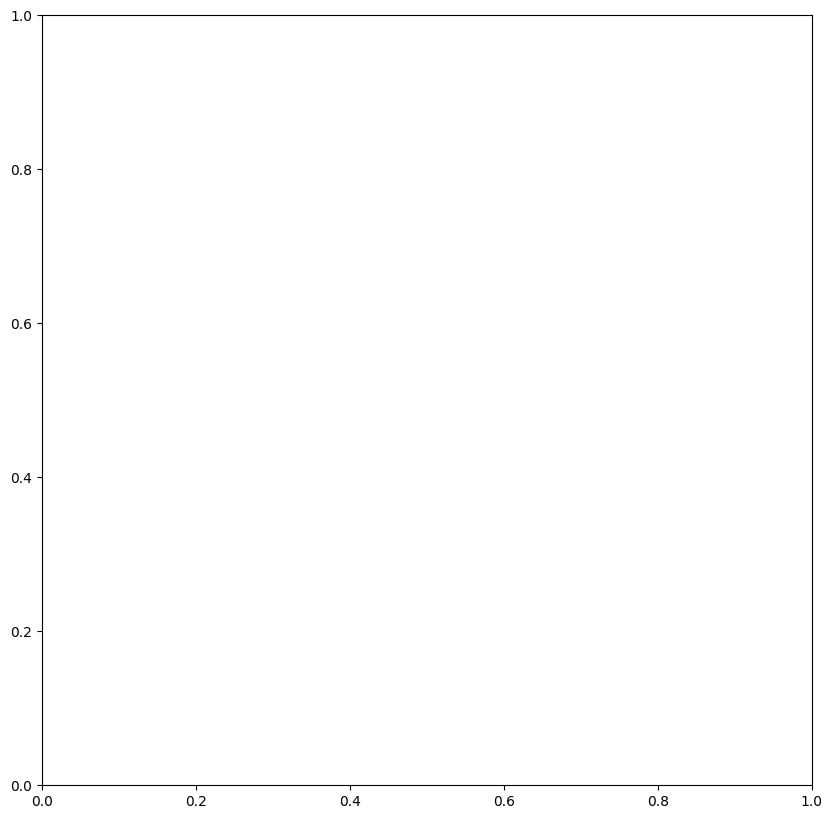

In [16]:
# plot the u_velocity data
fig = plt.figure(facecolor="w",figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

speed=(cont_u**2+cont_w**2)**0.5
minvel=0.0
maxvel=1.7
dev=3
label_val=np.linspace(minvel,maxvel,dev)
label_val=np.round(label_val, decimals=2)
#label_val=np.arange(0.0, 1.4, 0.6) #1:1:1
#label_val=np.arange(0.0, 1.71, 0.85) #1:1:2

#x1=[-2, -0.5, 0.5, 1.18, 1.19, 1.2, 2.5] #plt.axis([-3, 7, 0, 3])
#ng=40;dens=40; x1=[0, 0.5, 1.24, 2.3, 5.0]  #plt.axis([0, 5, 0, 3]) Roc 1:1:1
#ng=40;dens=50; x1=[0, 0.5, 1.24, 2.3, 5.0]  # Shelter                   1:1:1
#ng=40;dens=50; x1=[0, 0.5, 1.22, 2.25, 5.0] # ADMS                      1:1:1
#ng=40;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # prime                     1:1:1
#ng=40;dens=60;x1=[0, 0.5, 1.27, 2.3, 5.0]  # prime_roc                 1:1:1
#ng=60;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # Roc                       1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # Shelter                   1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.25, 2.25, 5.0]  # ADMS                      1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.5, 2.25, 5.0]  # prime                     1:1:2
#ng=60;dens=50;x1=[0, 0.5, 1.43, 2.3, 5.0]  # prime_roc                 1:1:2
dens=60;x1=[1.43,2.3] # test
#ng=25             # test
if asp == 111:
    fh = 2.0
elif asp == 112:
    fh = 3.0  
for a in x1:
    x1 = [a for i in range(ng)]
    y1 = np.linspace(0.1,fh,ng)
    seed_points =np.array([x1,y1])
#    strm=plt.streamplot(XX, ZZ, cont_u, cont_w, density=dens, linewidth=1, 
#                        color=speed, cmap='viridis', norm=None,
#                        arrowstyle='-',maxlength=50.0, 
#                        start_points=seed_points.T,integration_direction='both')
    # no legend
    strm=plt.streamplot(XX, ZZ, cont_u, cont_w, density=dens, linewidth=1, 
                        color='black', norm=None,
                        arrowstyle='-',maxlength=50.0, 
                        start_points=seed_points.T,integration_direction='both')

    #matplotlib.pyplot.streamplot(x, y, u, v, density=1, linewidth=None, 
    #  color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', 
    #  minlength=0.1, transform=None, zorder=None, start_points=None, 
    #  maxlength=4.0, integration_direction='both', *, data=None)
    # draw the obstacle


#plt.axis([-3, 7, 0, 3])
plt.axis([0, 5, 0, fh+0.01])
plt.xlabel('x/w')
plt.ylabel('z/w')
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(0, 5, 0.1), rotation=45 )
plt.yticks( np.arange(0, fh+0.01, 0.1) )


# draw an obstacle
if asp == 111:
    h = 1.0
elif asp == 112:
    h = 2.0   
rectangle = patches.Rectangle(xy=(0.0,0.0), width=1.0, height=h, 
                              edgecolor='black', facecolor='gray', fill=True)
ax.add_patch(rectangle)

## adjust colorbar
#fig_coord = [0.91,0.25,0.01,0.50]
#cbar_ax = fig.add_axes(fig_coord)
#cbar = plt.colorbar(cax=cbar_ax)
#cbar_ax.set_ylim(minvel,maxvel)
#cbar.set_ticks(label_val)
#cbar.set_ticklabels(label_val)
#ticklabs = cbar.ax.get_yticklabels()
##cbar.ax.set_yticklabels(ticklabs,ha='right')
#cbar.ax.yaxis.set_tick_params(pad=10)  # your number may vary
#cbar.set_label("Speed [m/s]")

figname_b='wang_{0}_{1}_stream_v_0.1mesh.png'
figname=figname_b.format(name,asp)
plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)